In [6]:
import sys
# sys.path.append("D:\thesis\thesis\rllib")

import rllib as rl
import json
import joblib
import numpy as np
import torch
dataset_train = "./data_preprossing/output/train_cleaned.csv"
dataset_test = "./data_preprossing/output/test_cleaned.csv"
symptom_map_file = "./data/basic/symptoms_db.json"
condition_map_file = "./data/basic/conditions_db.json"
# clf_file = "data/basic/data/output/rf/rf_clf.joblib"
# clf_file = "data/basic/data/output/rf/rf_clf.joblib"
clf_file = "./symtom_models/output/nb_nlice/nb_serialized_sparse.joblib"
clf_data = joblib.load(clf_file)
clf = clf_data.get('clf')
import datetime
import sys
from pathlib import Path
curr_path = str(Path().absolute())
parent_path = str(Path().absolute().parent)
sys.path.append(parent_path) # add current terminal path to sys.path
curr_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S") # obtain current time
test ="./data_preprossing/output/data/total_v1.csv"

In [7]:
env = rl.environment.RLBasicMedEnv(
    data_file=test,
    symptom_map_file=symptom_map_file,
    condition_map_file=condition_map_file,
    clf=clf,
    classifer="nb",
    max_turn=20,
    epoch = 1000
)

In [8]:
input_dim = 3 + 3*env.num_symptoms
output_dim = env.num_symptoms + 1
layer_config = [
    [input_dim, 128],
    [128, 64],
    [64, 48],
    [48, 32],
    [32, 32],
    [32, 48],
    [48, 64],
    [64, output_dim]
]

learning_start = 1280
batch_size = 64
target_update = 1280
replay_capacity = 1280

In [9]:
agent = rl.agent.MedAgent(
    env,
    layer_config=layer_config,
    learning_start=learning_start,
    batch_size=batch_size,
    target_update=target_update,
    replay_capacity=replay_capacity,
    debug=False,
    train = True,
    input_dim = input_dim,
    output_dim = output_dim,
    use_classfier = True
)

In [10]:
bench = rl.bench.MedBench(agent,50000)
bench.run_trial(debug=False)
cfg = rl.config.QlearningConfig()
rl.common.make_dir(cfg.result_path,cfg.model_path)
agent.save(cfg.model_path)

In [13]:

rewards,success,average_rewards,average_steps,loss =bench.rewardList,bench.get_success_rate(),bench.get_average_rewards(),bench.get_average_turn(),bench.get_loss()
print(success)
print(average_rewards,average_steps)
agent.train = False
agent.eps_start = 0
agent.eps_end = 0
testbench = rl.bench.MedBenchEval(agent,1000)
testbench.run_trial(debug=False)
rewards,success,average_rewards,average_steps =testbench.rewardList,testbench.get_success_rate(),testbench.get_average_rewards(),testbench.get_average_turn()
print(success)
print(average_rewards,average_steps)



4e-05
-19.7132 2.15992
0.0
-19.88 1.979


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from matplotlib.font_manager import FontProperties

def plot_loss(loss,tag="train",env="milestone1",algo = "DQN"):
    sns.set()
    plt.title("average learning curve of {} for {}".format(algo,env))
    plt.xlabel('epsiodes')
    plt.plot(loss,label='loss')
    plt.legend()


def plot_rewards(rewards,tag="train",env="milestone1",algo = "DQN"):
    sns.set()
    plt.title("average learning curve of {} for {}".format(algo,env))
    plt.xlabel('epsiodes')
    plt.plot(rewards,label='reward')
    plt.legend()


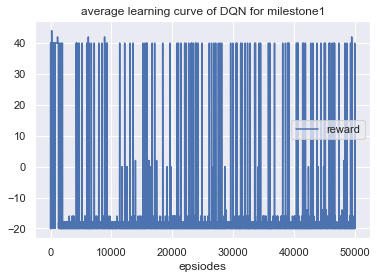

In [8]:
# plot_rewards(rewards)
eval = rewards
success = 0
plot_rewards(eval)


In [9]:

env1 = rl.environment.RLBasicMedEnv(
    data_file=dataset_test,
    symptom_map_file=symptom_map_file,
    condition_map_file=condition_map_file,
    clf=clf,
    classifer="nb",
    max_turn=20,
    epoch = 2000
)
agent1 = rl.agent.MedAgent(
    env1,
    layer_config=layer_config,
    learning_start=learning_start,
    batch_size=batch_size,
    target_update=target_update,
    replay_capacity=replay_capacity,
    eps_start = 0,
    eps_end = 0,
    debug=False,
    train = False
)
print(cfg.model_path)



d:\thesis\thesis/outputs/baseline/20211119-125313/models/


In [10]:
agent1.load(cfg.model_path)
testbench = rl.bench.MedBenchEval(agent1,1000)
testbench.run_trial(debug=False)
rewards,success,average_rewards,average_steps =testbench.rewardList,testbench.get_success_rate(),testbench.get_average_rewards(),testbench.get_average_turn()
print(success)
print(average_rewards,average_steps)

0.0
-19.996 2.0


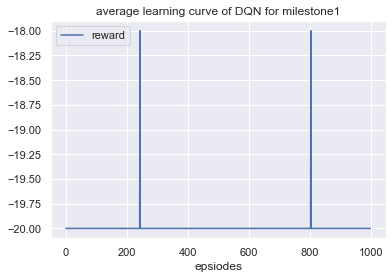

In [11]:
eval = rewards
success = 0
plot_rewards(eval)